[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1098/1098 [==============================] - 23s 18ms/step - loss: 8.8173e-04
Epoch 2/3
1098/1098 [==============================] - 21s 19ms/step - loss: 3.1853e-04
Epoch 3/3
10/10 [==============================] - 1s 12ms/step


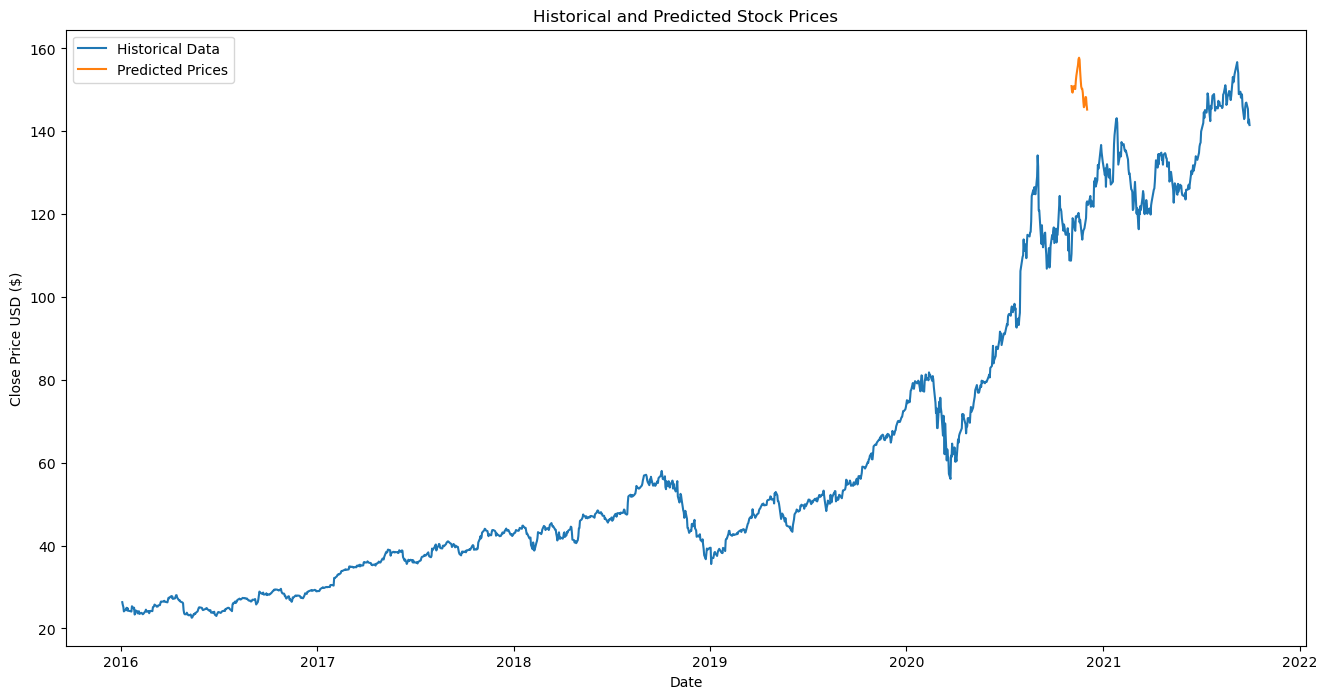

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the next 30 days
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Reshape predictions array
predictions = predictions[-30:]  # Select the last 30 predictions
predictions = predictions.reshape(-1)

# Create a DataFrame with predicted prices
dates = pd.date_range(start=stock_data.index[training_data_len+60], periods=30, freq='D')
predicted_prices = pd.DataFrame(predictions, index=dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1098/1098 [==============================] - 23s 18ms/step - loss: 7.8008e-04
Epoch 2/3
1098/1098 [==============================] - 21s 19ms/step - loss: 4.1068e-04
Epoch 3/3
1/1 [==============================] - 0s 22ms/step


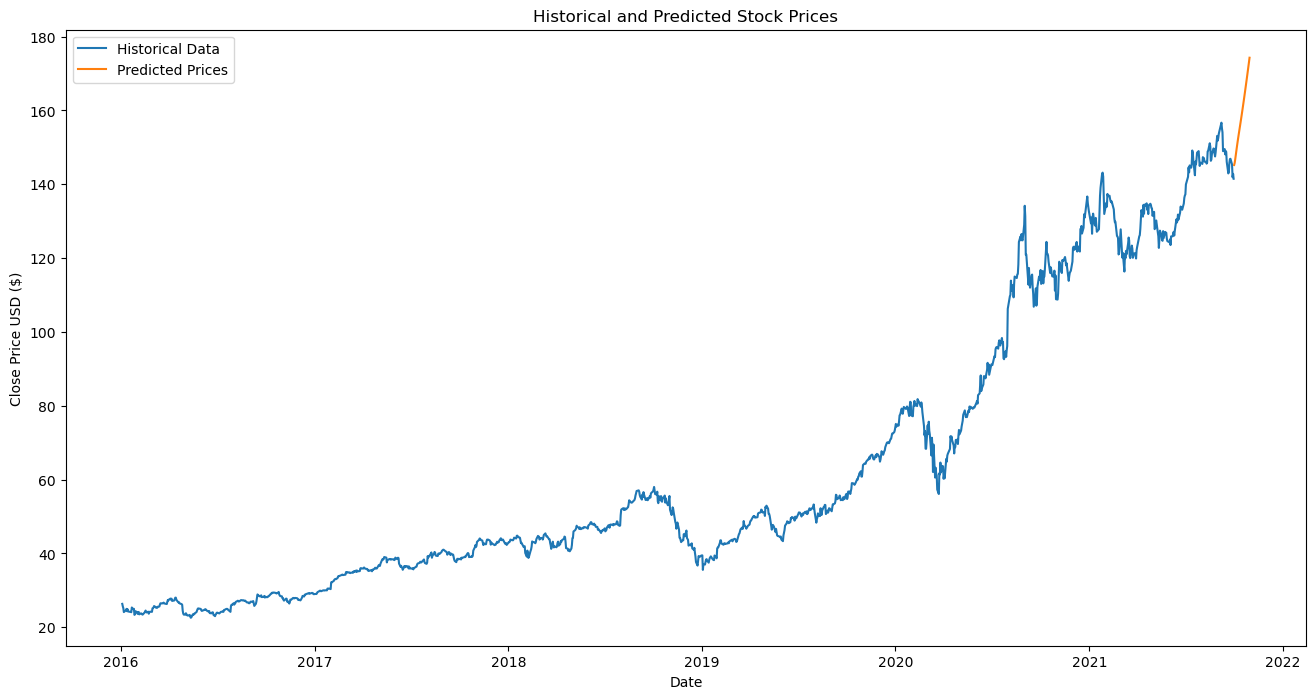

In [2]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


In [3]:
# Display the DataFrame with predicted prices
print(predicted_prices)

            Predicted Price
2021-10-01       145.225159
2021-10-02       145.811035
2021-10-03       146.772552
2021-10-04       147.837906
2021-10-05       148.917679
2021-10-06       149.977066
2021-10-07       151.003464
2021-10-08       151.995834
2021-10-09       152.959625
2021-10-10       153.903244
2021-10-11       154.835861
2021-10-12       155.765808
2021-10-13       156.699768
2021-10-14       157.642532
2021-10-15       158.597122
2021-10-16       159.565079
2021-10-17       160.546799
2021-10-18       161.541931
2021-10-19       162.549728
2021-10-20       163.569336
2021-10-21       164.599884
2021-10-22       165.640564
2021-10-23       166.690796
2021-10-24       167.750198
2021-10-25       168.818420
2021-10-26       169.895294
2021-10-27       170.980698
2021-10-28       172.074585
2021-10-29       173.176880
2021-10-30       174.287460


[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1449/1449 [==============================] - 30s 18ms/step - loss: 0.0016
Epoch 2/3
1449/1449 [==============================] - 28s 19ms/step - loss: 7.9042e-04
Epoch 3/3
1/1 [==============================] - 0s 30ms/step


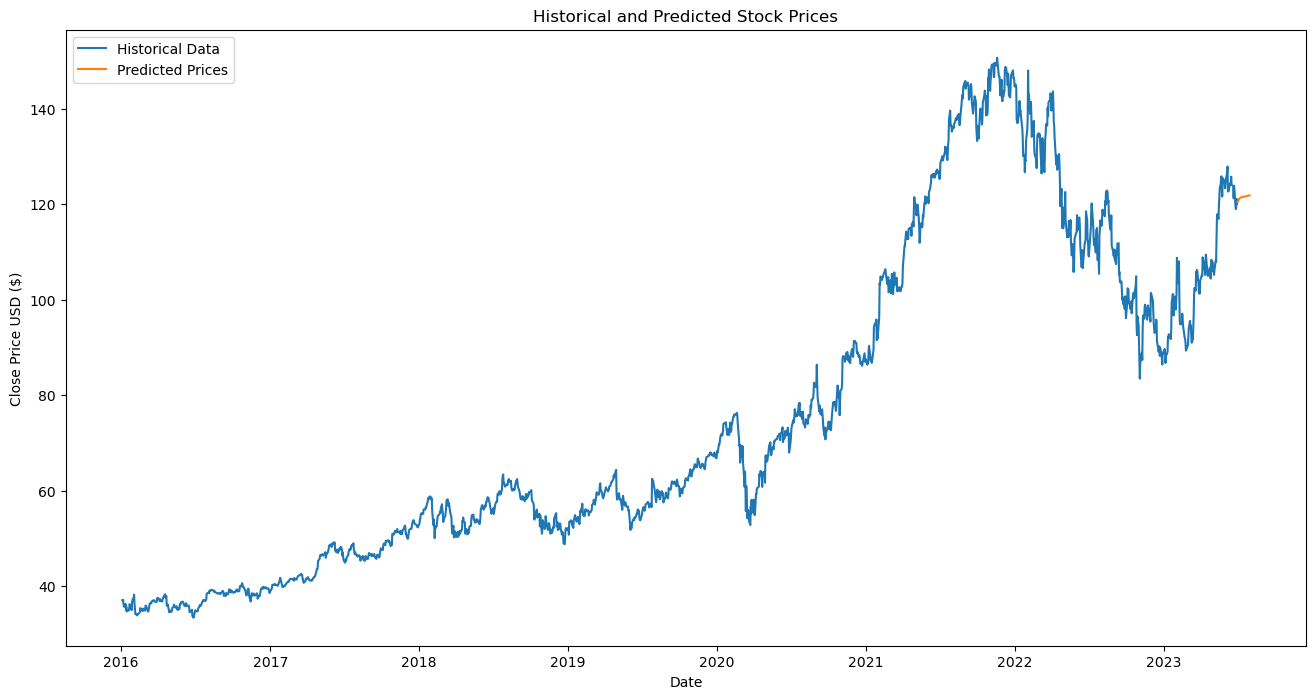

In [4]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('GOOG', start='2016-01-01', end='2023-07-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


In [5]:
# Display the DataFrame with predicted prices
print(predicted_prices)

            Predicted Price
2023-07-01       120.506378
2023-07-02       120.664101
2023-07-03       120.848953
2023-07-04       121.020302
2023-07-05       121.163483
2023-07-06       121.275146
2023-07-07       121.357536
2023-07-08       121.415565
2023-07-09       121.455124
2023-07-10       121.482010
2023-07-11       121.501122
2023-07-12       121.516396
2023-07-13       121.530548
2023-07-14       121.545349
2023-07-15       121.561699
2023-07-16       121.579918
2023-07-17       121.599915
2023-07-18       121.621391
2023-07-19       121.643890
2023-07-20       121.667030
2023-07-21       121.690437
2023-07-22       121.713814
2023-07-23       121.736946
2023-07-24       121.759697
2023-07-25       121.781998
2023-07-26       121.803841
2023-07-27       121.825218
2023-07-28       121.846176
2023-07-29       121.866730
2023-07-30       121.886948


[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1449/1449 [==============================] - 29s 18ms/step - loss: 0.0014
Epoch 2/3
1449/1449 [==============================] - 27s 19ms/step - loss: 5.1182e-04
Epoch 3/3
1/1 [==============================] - 0s 20ms/step


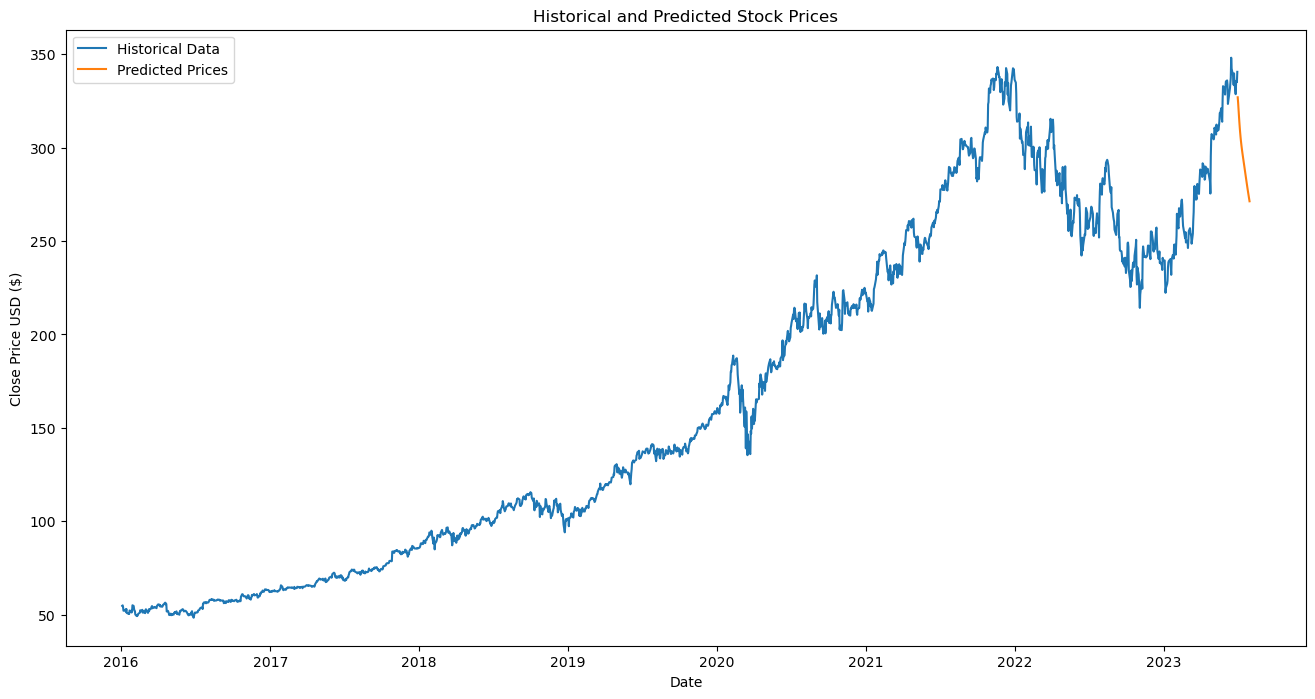

In [6]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('MSFT', start='2016-01-01', end='2023-07-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


In [7]:
# Display the DataFrame with predicted prices
print(predicted_prices)

            Predicted Price
2023-07-01       326.930420
2023-07-02       324.071075
2023-07-03       320.588287
2023-07-04       317.087677
2023-07-05       313.777771
2023-07-06       310.741638
2023-07-07       308.005493
2023-07-08       305.561157
2023-07-09       303.378448
2023-07-10       301.414734
2023-07-11       299.622345
2023-07-12       297.954651
2023-07-13       296.369812
2023-07-14       294.833435
2023-07-15       293.319580
2023-07-16       291.810760
2023-07-17       290.296661
2023-07-18       288.773682
2023-07-19       287.242584
2023-07-20       285.707489
2023-07-21       284.174194
2023-07-22       282.649170
2023-07-23       281.138702
2023-07-24       279.648254
2023-07-25       278.182037
2023-07-26       276.743073
2023-07-27       275.333038
2023-07-28       273.952454
2023-07-29       272.601074
2023-07-30       271.277924


[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1449/1449 [==============================] - 29s 18ms/step - loss: 0.0015
Epoch 2/3
1449/1449 [==============================] - 27s 19ms/step - loss: 5.7213e-04
Epoch 3/3
1/1 [==============================] - 0s 30ms/step


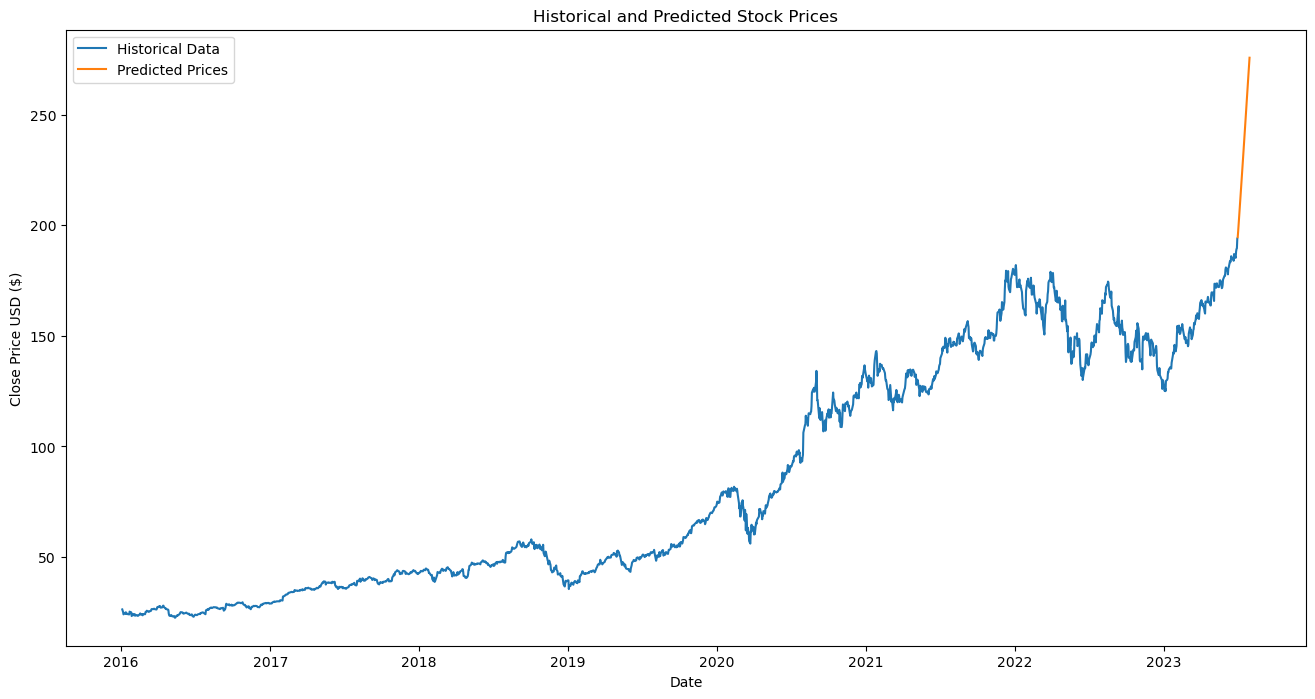

            Predicted Price
2023-07-01       194.609055
2023-07-02       197.033997
2023-07-03       199.707474
2023-07-04       202.442520
2023-07-05       205.191025
2023-07-06       207.940887
2023-07-07       210.690048
2023-07-08       213.439896
2023-07-09       216.192947
2023-07-10       218.952011
2023-07-11       221.719528
2023-07-12       224.497543
2023-07-13       227.287262
2023-07-14       230.089523
2023-07-15       232.904343
2023-07-16       235.731415
2023-07-17       238.570023
2023-07-18       241.418976
2023-07-19       244.276764
2023-07-20       247.141891
2023-07-21       250.012527
2023-07-22       252.886734
2023-07-23       255.762497
2023-07-24       258.637726
2023-07-25       261.510254
2023-07-26       264.377930
2023-07-27       267.238403
2023-07-28       270.089569
2023-07-29       272.929230
2023-07-30       275.755066


In [8]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2016-01-01', end='2023-07-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()

# Display the DataFrame with predicted prices
print(predicted_prices)

[*********************100%***********************]  1 of 1 completed
Epoch 1/3
442/442 [==============================] - 11s 17ms/step - loss: 0.0077
Epoch 2/3
442/442 [==============================] - 8s 18ms/step - loss: 0.0035
Epoch 3/3
1/1 [==============================] - 0s 28ms/step


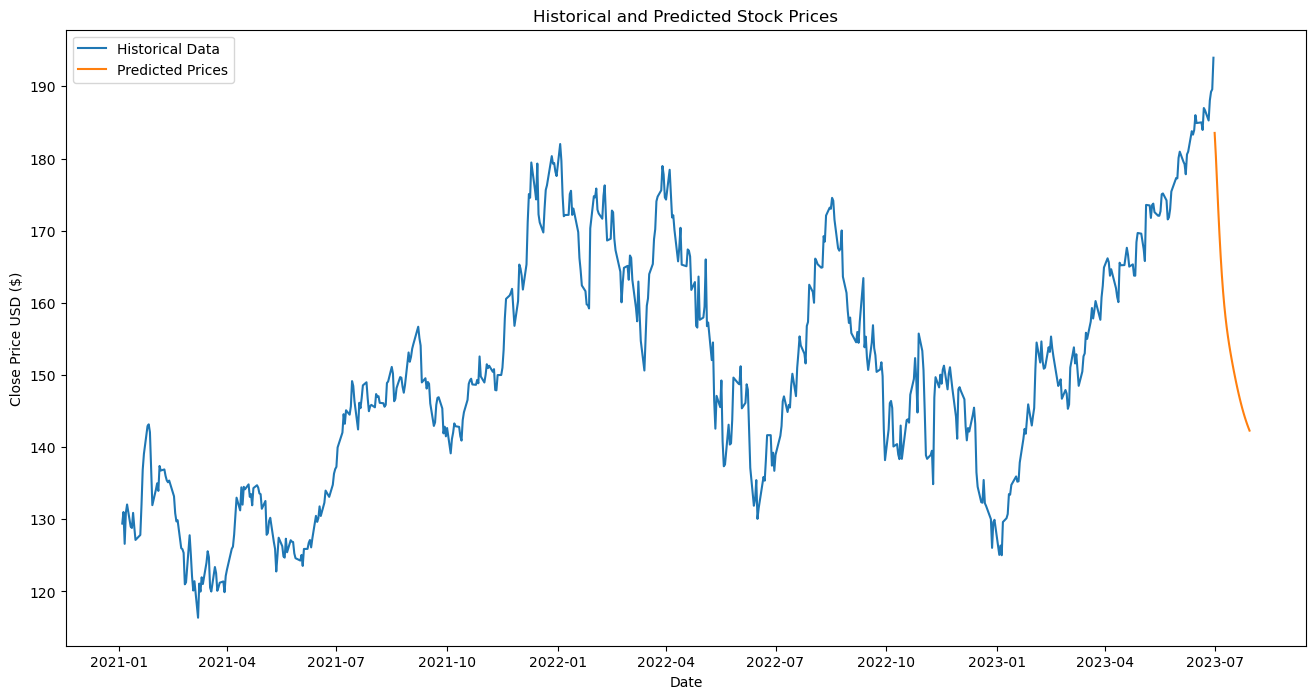

            Predicted Price
2023-07-01       183.547455
2023-07-02       180.371689
2023-07-03       176.635254
2023-07-04       172.937851
2023-07-05       169.514450
2023-07-06       166.468399
2023-07-07       163.827988
2023-07-08       161.574234
2023-07-09       159.661209
2023-07-10       158.031067
2023-07-11       156.624527
2023-07-12       155.387604
2023-07-13       154.275070
2023-07-14       153.251907
2023-07-15       152.292892
2023-07-16       151.381516
2023-07-17       150.508179
2023-07-18       149.668304
2023-07-19       148.860703
2023-07-20       148.086060
2023-07-21       147.345871
2023-07-22       146.641632
2023-07-23       145.974365
2023-07-24       145.344406
2023-07-25       144.751434
2023-07-26       144.194397
2023-07-27       143.671783
2023-07-28       143.181732
2023-07-29       142.722153
2023-07-30       142.290924


In [9]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2021-01-01', end='2023-07-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()

# Display the DataFrame with predicted prices
print(predicted_prices)

[*********************100%***********************]  1 of 1 completed
Epoch 1/3
240/240 [==============================] - 7s 17ms/step - loss: 0.0090
Epoch 2/3
240/240 [==============================] - 4s 17ms/step - loss: 0.0059
Epoch 3/3
1/1 [==============================] - 0s 28ms/step


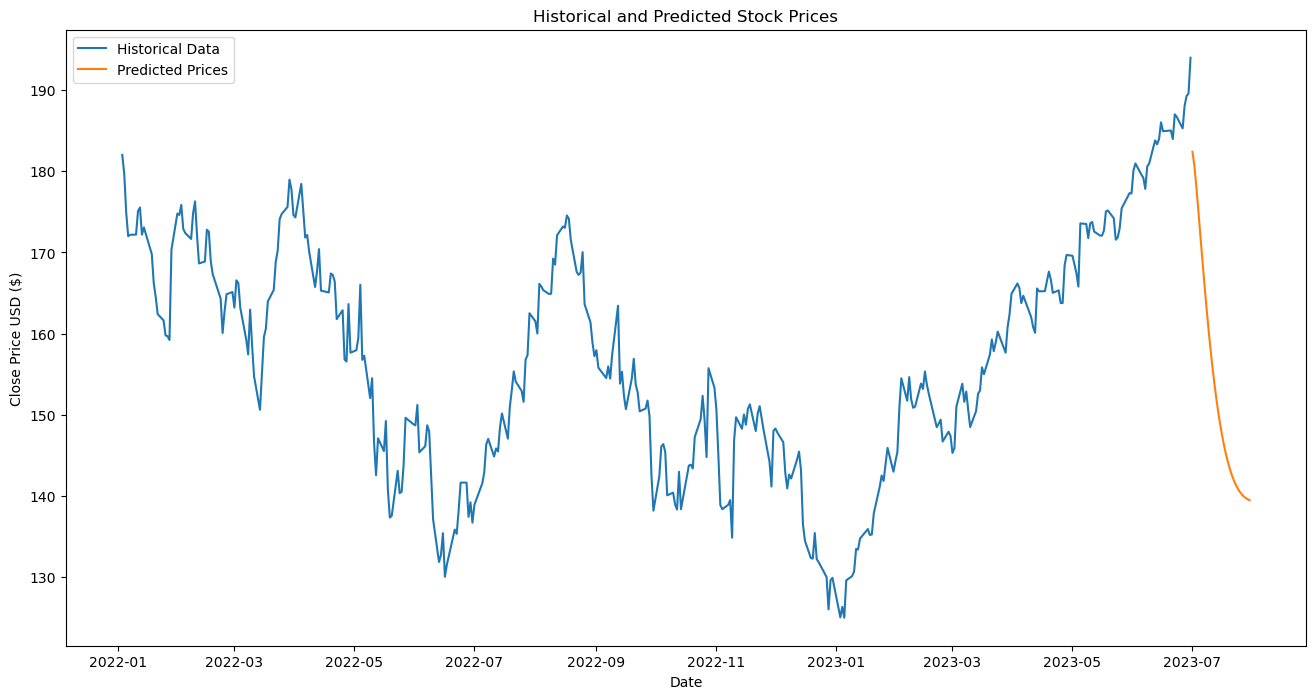

            Predicted Price
2023-07-01       182.387680
2023-07-02       180.594803
2023-07-03       177.988708
2023-07-04       175.093353
2023-07-05       172.114822
2023-07-06       169.155411
2023-07-07       166.276810
2023-07-08       163.519989
2023-07-09       160.912430
2023-07-10       158.471634
2023-07-11       156.207321
2023-07-12       154.123184
2023-07-13       152.218369
2023-07-14       150.488617
2023-07-15       148.927368
2023-07-16       147.526367
2023-07-17       146.276398
2023-07-18       145.167694
2023-07-19       144.190231
2023-07-20       143.334091
2023-07-21       142.589493
2023-07-22       141.947006
2023-07-23       141.397629
2023-07-24       140.932724
2023-07-25       140.544189
2023-07-26       140.224380
2023-07-27       139.966125
2023-07-28       139.762756
2023-07-29       139.608017
2023-07-30       139.496170


In [10]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2022-01-01', end='2023-07-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()

# Display the DataFrame with predicted prices
print(predicted_prices)

In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values